In [33]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
df = pd.read_csv("df_k2_new.csv")
pd.set_option('display.max_columns', None)

In [47]:
df.head()

,disposition,num_stars,num_planets,discover_method,disc_facility,orbital_period,planet_radius,st_spectype,stellar_temp,stellar_radius,stellar_mass,stellar_surface_gravity,right_ascension,declination,system_distance,sy_vmag,sy_kmag,sy_gaiamag
0,CONFIRMED,1,1,Transit,K2,41.688644,2.355454,0,5703.00,0.956122,0.963861,4.38000,53.651123,20.599021,179.4610,10.849,9.368,10.8644
1,CONFIRMED,1,1,Transit,K2,41.685500,2.230000,1,5766.00,0.928000,0.961000,4.50000,53.651123,20.599021,179.4610,10.849,9.368,10.8644
2,CONFIRMED,1,1,Transit,K2,41.685500,2.578070,0,5766.00,1.080000,1.670000,4.50000,53.651123,20.599021,179.4610,10.849,9.368,10.8644
3,CANDIDATE,1,0,Transit,K2,2.301830,1.120000,0,4616.52,0.762602,0.730000,4.53679,183.846245,-6.268329,97.1795,11.727,9.220,11.3995
4,CANDIDATE,1,0,Transit,K2,2.302368,1.312588,0,4720.00,0.710995,NaN,4.50000,183.846245,-6.268329,97.1795,11.727,9.220,11.3995


In [48]:
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded["disposition_encoded"] = label_encoder.fit_transform(df["disposition"])

In [49]:
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix_disposition = corr_matrix["disposition_encoded"].sort_values(ascending=False)
print(corr_matrix_disposition)

disposition_encoded        1.000000
num_planets                0.348394
declination                0.124929
num_stars                  0.082483
stellar_temp               0.013708
stellar_mass              -0.002057
stellar_surface_gravity   -0.007711
orbital_period            -0.021078
right_ascension           -0.023857
st_spectype               -0.044912
stellar_radius            -0.069133
system_distance           -0.082009
planet_radius             -0.094180
sy_kmag                   -0.113683
sy_gaiamag                -0.117483
sy_vmag                   -0.125955
Name: disposition_encoded, dtype: float64


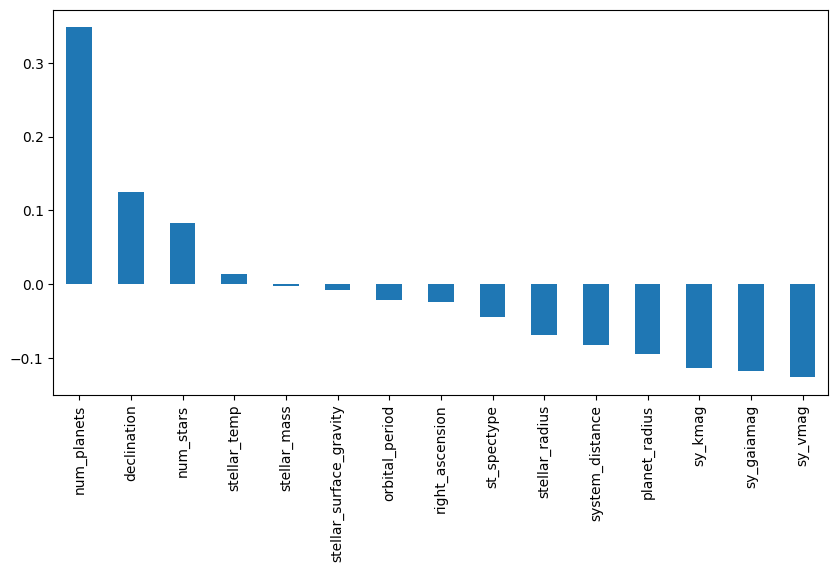

In [50]:
corr_matrix_disposition.drop("disposition_encoded").plot(kind="bar", figsize = (10,5))
plt.show()

In [51]:
spearman_corr = df_encoded.corr(method='spearman', numeric_only=True)
spearman_with_disposition = spearman_corr["disposition_encoded"].sort_values(ascending=False)
print(spearman_with_disposition)

disposition_encoded        1.000000
num_planets                0.540820
declination                0.119189
num_stars                  0.108015
stellar_mass               0.026495
stellar_temp               0.020918
stellar_radius            -0.003358
stellar_surface_gravity   -0.022947
orbital_period            -0.029427
st_spectype               -0.032800
right_ascension           -0.033378
planet_radius             -0.127658
sy_vmag                   -0.148015
sy_gaiamag                -0.150860
system_distance           -0.155617
sy_kmag                   -0.162228
Name: disposition_encoded, dtype: float64


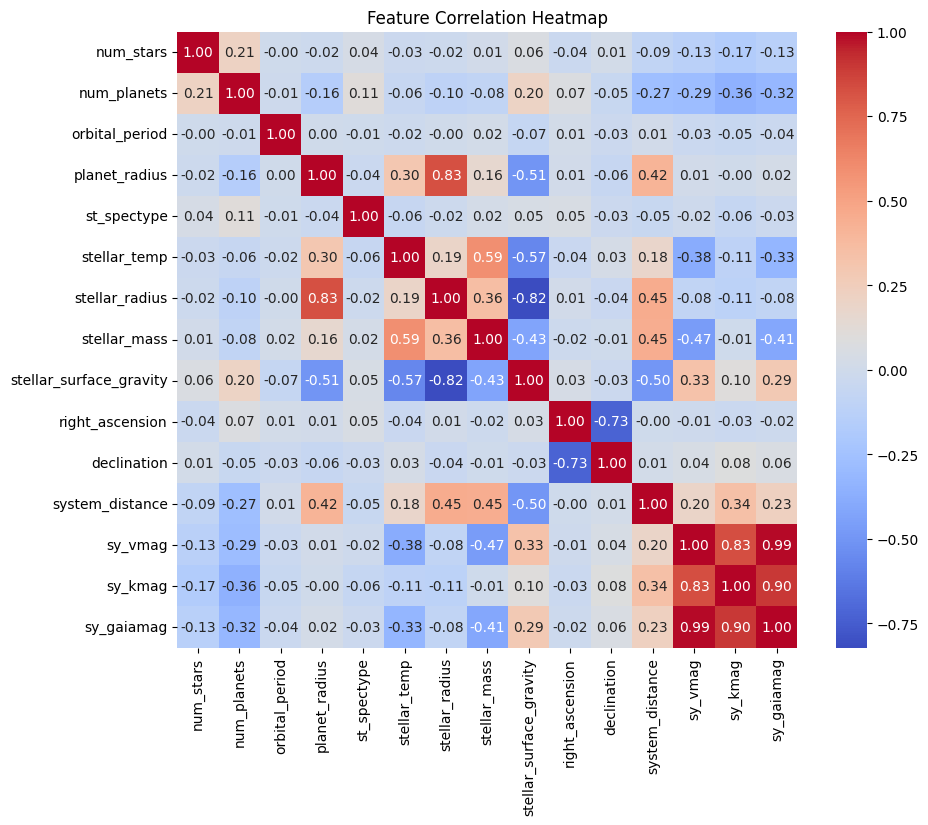

Highly correlated pairs (|r| > 0.8):
 sy_vmag                  sy_gaiamag                 0.986887
sy_gaiamag               sy_vmag                    0.986887
sy_kmag                  sy_gaiamag                 0.899873
sy_gaiamag               sy_kmag                    0.899873
sy_vmag                  sy_kmag                    0.834704
sy_kmag                  sy_vmag                    0.834704
stellar_radius           planet_radius              0.825393
planet_radius            stellar_radius             0.825393
stellar_radius           stellar_surface_gravity    0.821058
stellar_surface_gravity  stellar_radius             0.821058
dtype: float64


In [52]:

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap for visual inspection
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Optionally, print pairs with correlation > 0.8
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1) & (high_corr > 0.8)]
print("Highly correlated pairs (|r| > 0.8):\n", high_corr)


In [53]:
df_hcp_removed = df.drop([
    'sy_gaiamag',
    'sy_vmag',
    'stellar_radius',       
],axis=1)

In [56]:
df_hcp_removed.head()

,disposition,num_stars,num_planets,discover_method,disc_facility,orbital_period,planet_radius,st_spectype,stellar_temp,stellar_mass,stellar_surface_gravity,right_ascension,declination,system_distance,sy_kmag
0,CONFIRMED,1,1,Transit,K2,41.688644,2.355454,0,5703.00,0.963861,4.38000,53.651123,20.599021,179.4610,9.368
1,CONFIRMED,1,1,Transit,K2,41.685500,2.230000,1,5766.00,0.961000,4.50000,53.651123,20.599021,179.4610,9.368
2,CONFIRMED,1,1,Transit,K2,41.685500,2.578070,0,5766.00,1.670000,4.50000,53.651123,20.599021,179.4610,9.368
3,CANDIDATE,1,0,Transit,K2,2.301830,1.120000,0,4616.52,0.730000,4.53679,183.846245,-6.268329,97.1795,9.220
4,CANDIDATE,1,0,Transit,K2,2.302368,1.312588,0,4720.00,NaN,4.50000,183.846245,-6.268329,97.1795,9.220


In [57]:
df_hcp_removed["disposition_encoded"] = label_encoder.fit_transform(df["disposition"])
corr_matrix = df_hcp_removed.corr(numeric_only=True)
corr_matrix_disposition = corr_matrix["disposition_encoded"].sort_values(ascending=False)
print(corr_matrix_disposition)


disposition_encoded        1.000000
num_planets                0.348394
declination                0.124929
num_stars                  0.082483
stellar_temp               0.013708
stellar_mass              -0.002057
stellar_surface_gravity   -0.007711
orbital_period            -0.021078
right_ascension           -0.023857
st_spectype               -0.044912
system_distance           -0.082009
planet_radius             -0.094180
sy_kmag                   -0.113683
Name: disposition_encoded, dtype: float64
